# Scipy.io wavfile

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

%matplotlib inline


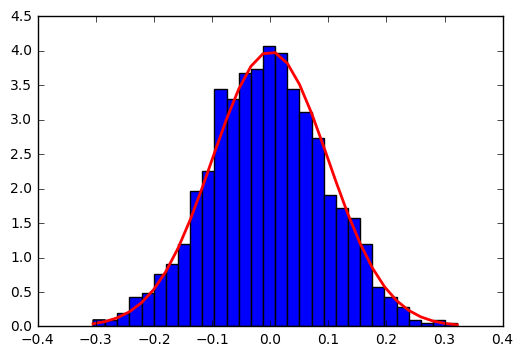

In [33]:
# generate normal distribution 

mu = 0 # expectatiion = mean
sigma = 0.1 # standard deviation

s =  np.random.normal(mu, sigma, 1000)


count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot( bins, 1/(sigma * np.sqrt(2 * np.pi)) * \
          np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [3]:
print bins # =  linspace(min, max, binsize) 

[-0.33502368 -0.31243179 -0.2898399  -0.26724801 -0.24465612 -0.22206423
 -0.19947234 -0.17688045 -0.15428856 -0.13169667 -0.10910478 -0.08651289
 -0.063921   -0.04132911 -0.01873722  0.00385467  0.02644656  0.04903845
  0.07163035  0.09422224  0.11681413  0.13940602  0.16199791  0.1845898
  0.20718169  0.22977358  0.25236547  0.27495736  0.29754925  0.32014114
  0.34273303]


In [35]:
#check

np.sqrt(sum((s - np.mean(s))**2)/len(s)) #sigma

0.10008893666016369

In [52]:


rate, audio = wavfile.read('D_1001710.wav')

In [6]:
# compute parameters

muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

-33.0996302981
3657.13662845


In [7]:
binSize = int(audio.shape[0]**(1/3.0))


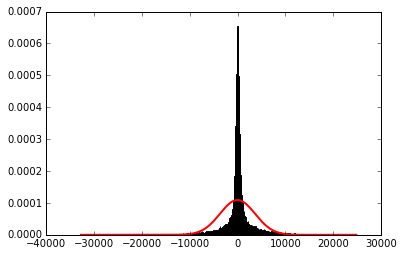

In [8]:
countA, binsA, ignoredA = plt.hist(audio, 1000, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

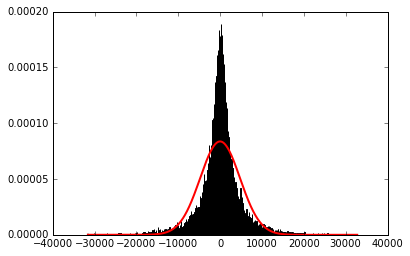

In [9]:
rateSpoof, audioSpoof = wavfile.read('D_1001709.wav')
muAudioSpoof = audioSpoof.mean()
sigmaAudioSpoof = np.sqrt(sum((audioSpoof - audioSpoof.mean())**2)/len(audioSpoof))

#binSize = int(audioSpoof.shape[0]**(1/3.0))
countA, binsA, ignoredA = plt.hist(audioSpoof, 1000, normed=True)
plt.plot( binsA, 1/(sigmaAudioSpoof * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudioSpoof)**2 / (2 * sigmaAudioSpoof**2) ),linewidth=2, color='r')
plt.show()

In [10]:
print sigmaAudioSpoof
print sigmaAudio

4768.24530805
3657.13662845


# Librosa  

In [11]:
import librosa

audio, rate = librosa.load('D_1000001.wav')

-0.0010083
0.111605769675
45


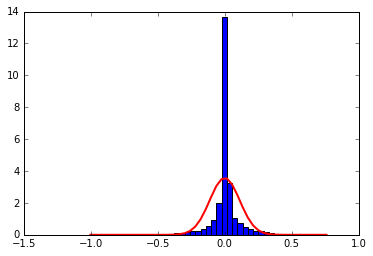

In [12]:
muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

binSize = int(audio.shape[0]**(1/3.0)) # propotrion to the root of the three degree = x**(1/3.0)

print binSize

countA, binsA, ignoredA = plt.hist(audio, binSize, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

-0.000155488
0.143528517547
31


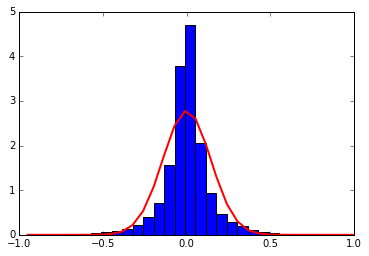

In [13]:
audio, rate = librosa.load('D_1001709.wav')

muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

binSize = int(audio.shape[0]**(1/3.0))
print binSize

countA, binsA, ignoredA = plt.hist(audio, binSize, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

-0.000161023
0.0842903425144
35


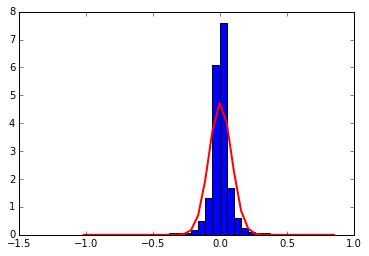

In [14]:
audio, rate = librosa.load('D_1001710.wav')

muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

binSize = int(audio.shape[0]**(1/3.0))
print binSize
countA, binsA, ignoredA = plt.hist(audio, binSize, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

In [15]:
# More signals

rate, o1 = wavfile.read('D_1000001.wav')
rate,o2 = wavfile.read('D_1000002.wav')
rate,o3 = wavfile.read('D_1000003.wav')

rate,s1 = wavfile.read('D_1001708.wav')
rate,s2 = wavfile.read('D_1001709.wav')
rate,s3 = wavfile.read('D_1001710.wav')

# original files

print np.sqrt(sum((o1 - o1.mean())**2)/len(o1))
print np.sqrt(sum((o2 - o2.mean())**2)/len(o2))
print np.sqrt(sum((o3 - o3.mean())**2)/len(o3))

print '-'*10
# spoofed

print np.sqrt(sum((s1 - o1.mean())**2)/len(o1))
print np.sqrt(sum((s2 - s2.mean())**2)/len(s2))
print np.sqrt(sum((s3 - s3.mean())**2)/len(s3))


3657.13662845
3402.97433635
3116.40485764
----------
2042.5503528
4768.24530805
2838.95096337


# works with data

In [8]:
import pandas as pd
dataframe = pd.read_csv('train_label.csv')

nSamplesOriginal =  dataframe[dataframe.Type=='genuine'].FileID.shape[0]
nSamplesSpoof =  dataframe[dataframe.Type=='spoof'].FileID.shape[0]

nameFilesOriginal = dataframe[dataframe.Type=='genuine'].FileID[:nSamplesOriginal]
nameFilesSpoof = dataframe[dataframe.Type=='spoof'].FileID[:nSamplesSpoof]



In [10]:
sigmaVectorOriginal = []
varOriginal = []
meanOriginal = []

for i in nameFilesOriginal:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/train/' + i)
    sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    varOriginal.append(sigmaAudio**2)
    sigmaVectorOriginal.append(sigmaAudio)
    meanOriginal.append(np.mean(audio))
    
sigmaVectorSpoof = []
varSpoof = []
meanSpoof = [] 
for i in nameFilesSpoof:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/train/' + i)
    sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    
    varSpoof.append(sigmaAudio**2)
    sigmaVectorSpoof.append(sigmaAudio)
    meanSpoof.append(np.mean(audio))


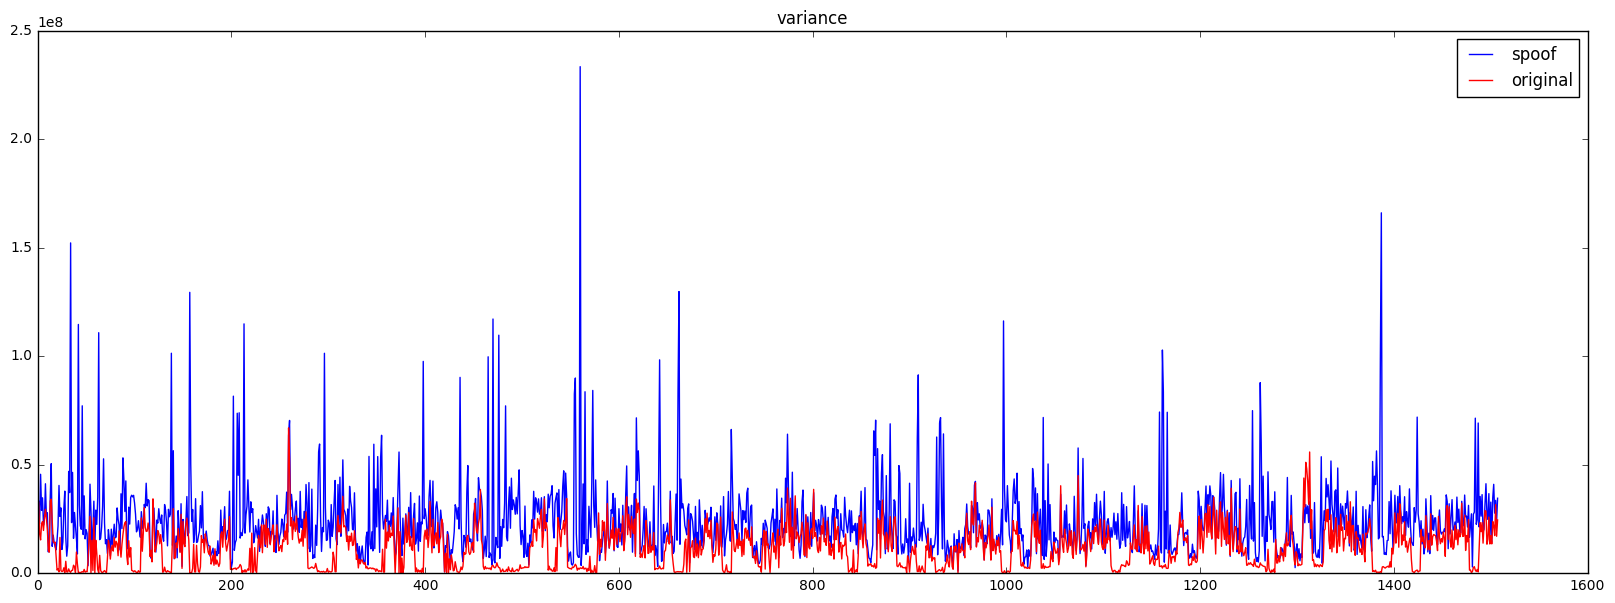

In [11]:
plt.figure(figsize=(20,7))
plt.plot(varSpoof, color = 'blue', label="spoof")
plt.title('variance')
plt.plot(varOriginal, color = 'red', label="original")
plt.legend()
plt.show()

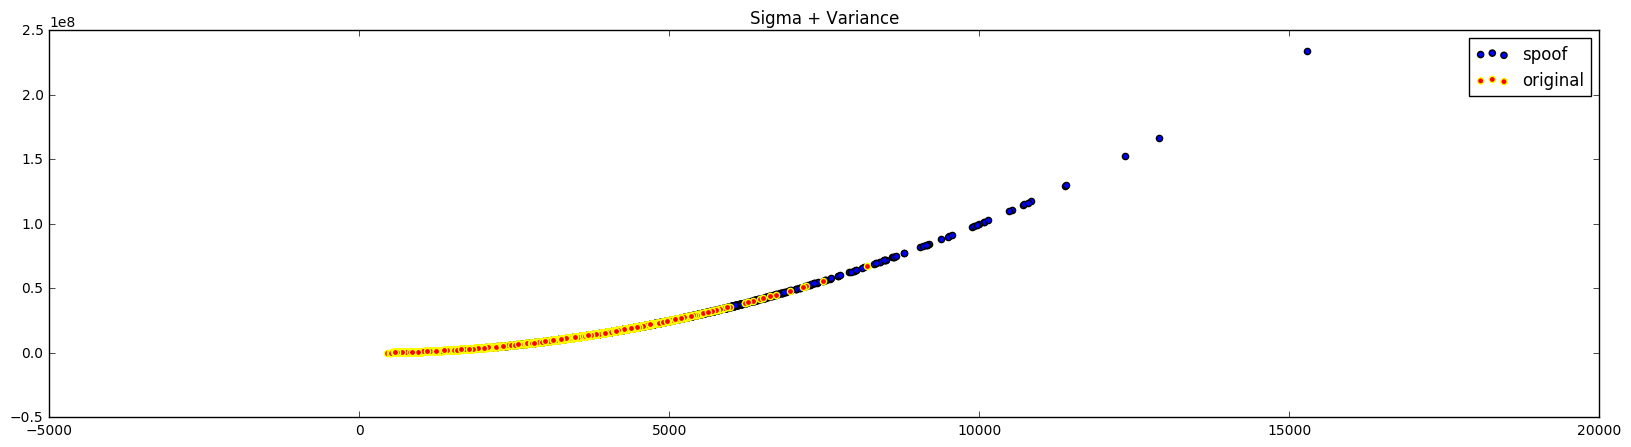

In [12]:
plt.figure(figsize=(20,5))
plt.title('Sigma + Variance')
plt.scatter(sigmaVectorSpoof, varSpoof, label="spoof")
plt.scatter(sigmaVectorOriginal,varOriginal, color = 'red',edgecolors='yellow', label="original")
plt.legend()
plt.show()

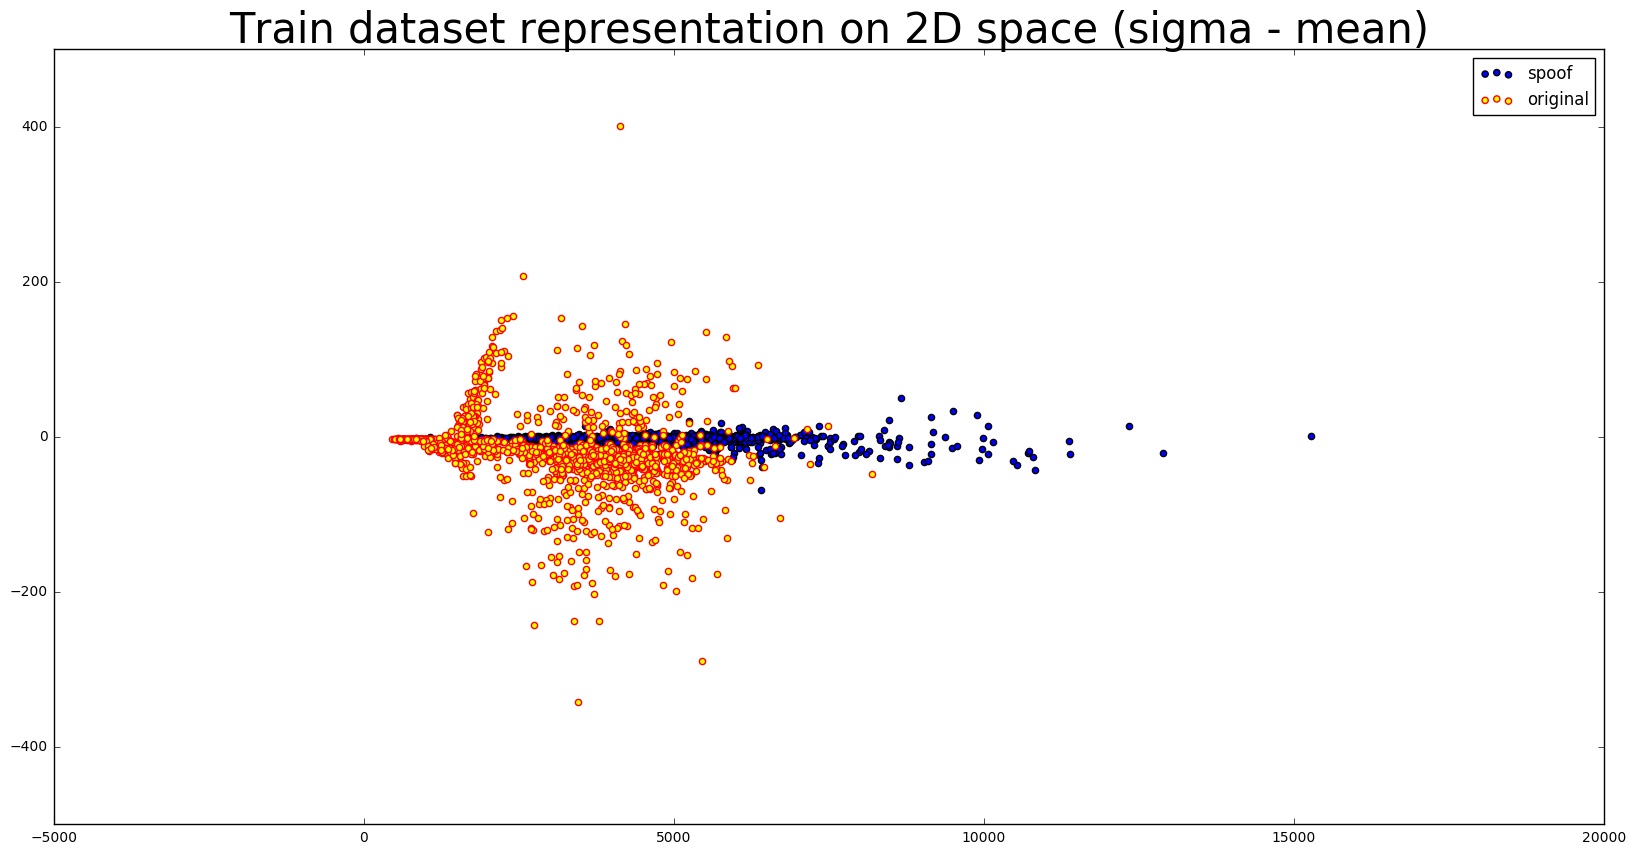

In [13]:
plt.figure(figsize=(20,10))
plt.title('Train dataset representation on 2D space (sigma - mean)', size = 30)
plt.scatter(sigmaVectorSpoof, meanSpoof,  label="spoof")
plt.ylim(-500, 500)
plt.scatter(sigmaVectorOriginal,meanOriginal, color = 'yellow', edgecolors='red', label="original")
plt.legend()
plt.show()

In [14]:
from mpl_toolkits.mplot3d import Axes3D

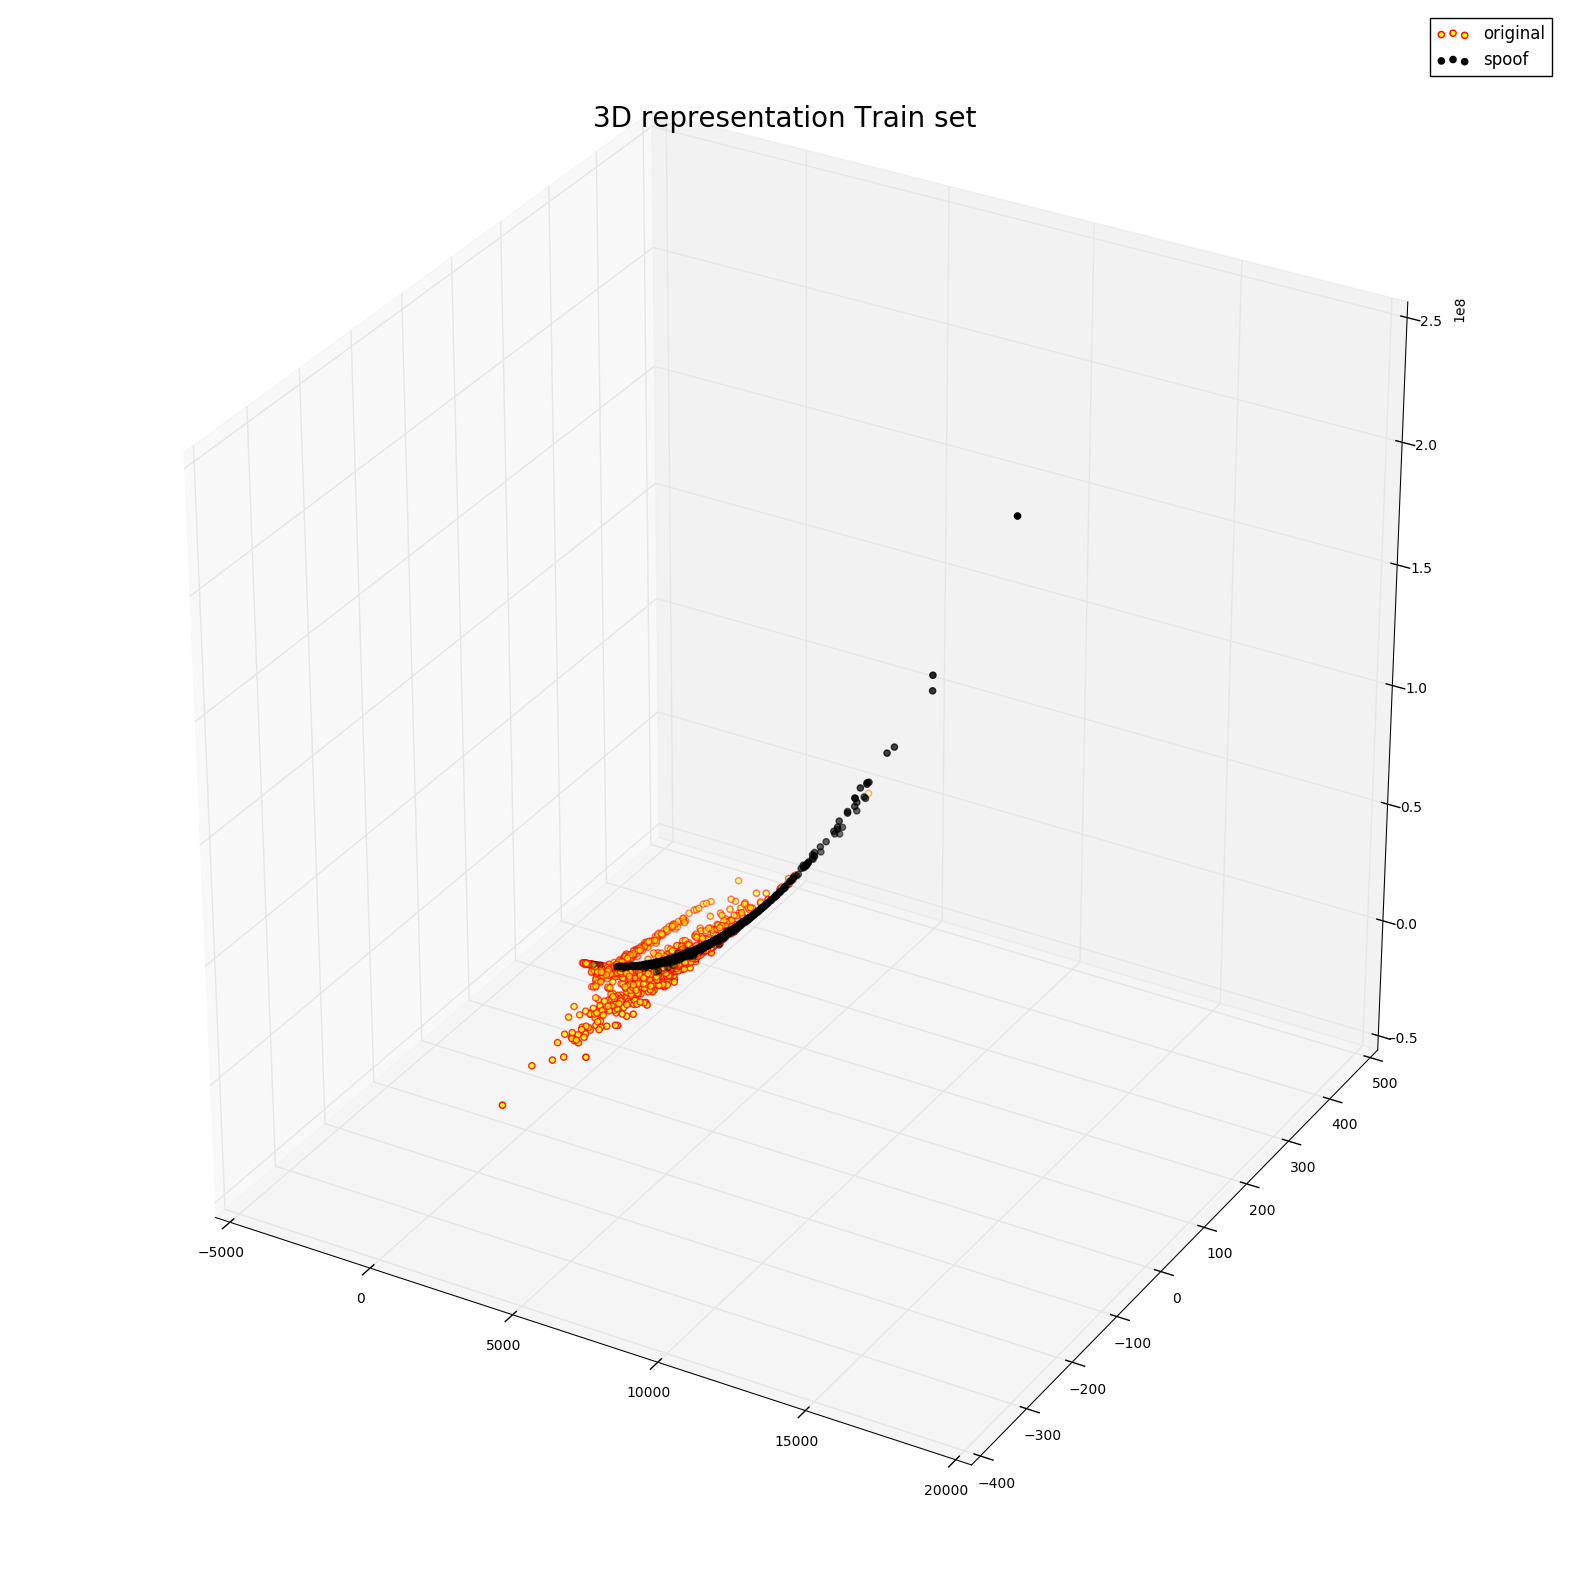

In [16]:
# here we plot 3D model: x = sigma, y = mean, z = variance

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D representation Train set', size = 20)
ax.scatter(sigmaVectorOriginal,meanOriginal, varOriginal, color = 'yellow',edgecolors = 'red', marker ='o', label = 'original')
ax.scatter(sigmaVectorSpoof, meanSpoof,  varSpoof, color = 'black', marker ='o', label = 'spoof')

plt.legend()
plt.show()

## Development

In [17]:
import pandas as pd
dataframe = pd.read_csv('dev_label.csv')

nSamplesOriginalD =  dataframe[dataframe.Type=='genuine'].FileID.shape[0]
nSamplesSpoofD =  dataframe[dataframe.Type=='spoof'].FileID.shape[0]

nameFilesOriginalD = dataframe[dataframe.Type=='genuine'].FileID[:nSamplesOriginal]
nameFilesSpoofD = dataframe[dataframe.Type=='spoof'].FileID[:nSamplesSpoof]



In [18]:
sigmaVectorOriginalD = []
varOriginalD = []
meanOriginalD = []

for i in nameFilesOriginalD:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/dev/' + i)
    sigmaAudioD = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    varOriginalD.append(sigmaAudioD**2)
    sigmaVectorOriginalD.append(sigmaAudioD)
    meanOriginalD.append(np.mean(audio))
    
sigmaVectorSpoofD = []
varSpoofD = []
meanSpoofD = [] 
for i in nameFilesSpoofD:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/dev/' + i)
    sigmaAudioD = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    
    varSpoofD.append(sigmaAudioD**2)
    sigmaVectorSpoofD.append(sigmaAudioD)
    meanSpoofD.append(np.mean(audio))


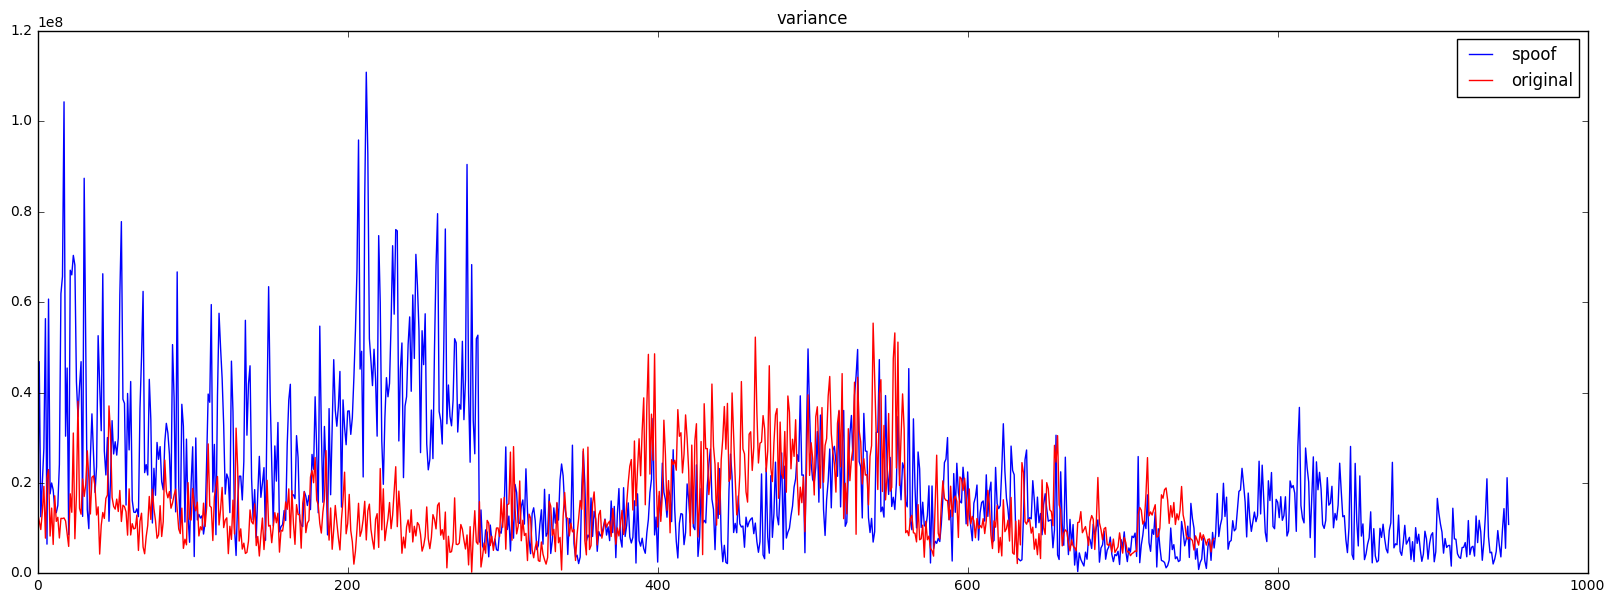

In [19]:
plt.figure(figsize=(20,7))
plt.plot(varSpoofD, label="spoof")
plt.title('variance')
plt.plot(varOriginalD, color = 'red', label="original")
plt.legend()
plt.show()

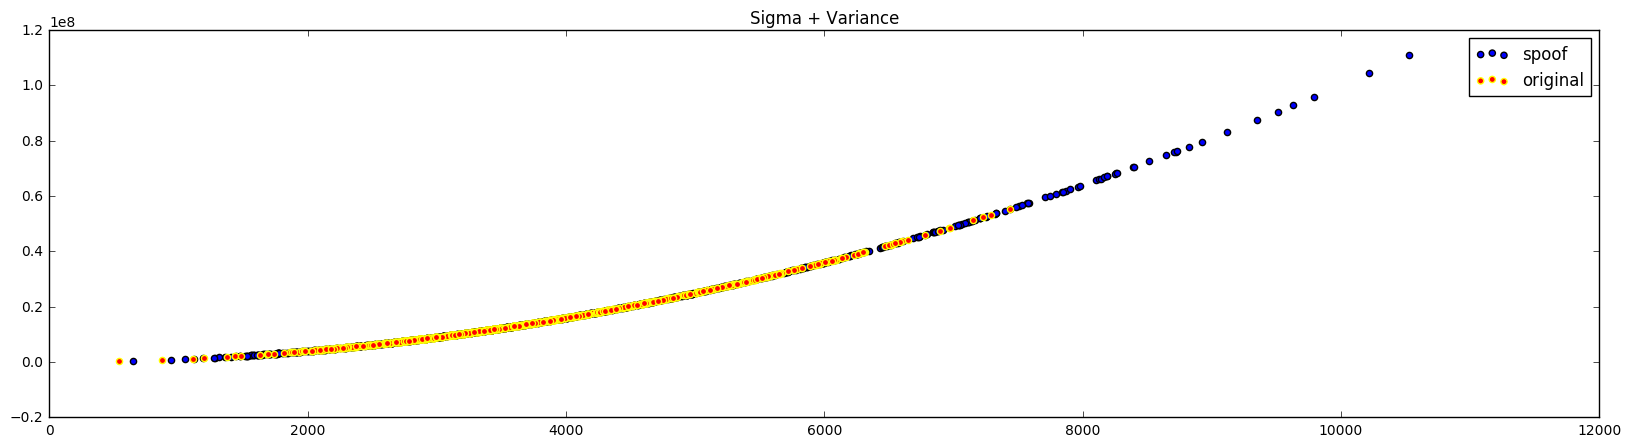

In [20]:
plt.figure(figsize=(20,5))
plt.title('Sigma + Variance')
plt.scatter(sigmaVectorSpoofD, varSpoofD, label="spoof")
plt.scatter(sigmaVectorOriginalD,varOriginalD, color = 'red', edgecolors='yellow', label="original")
plt.legend()
plt.show()

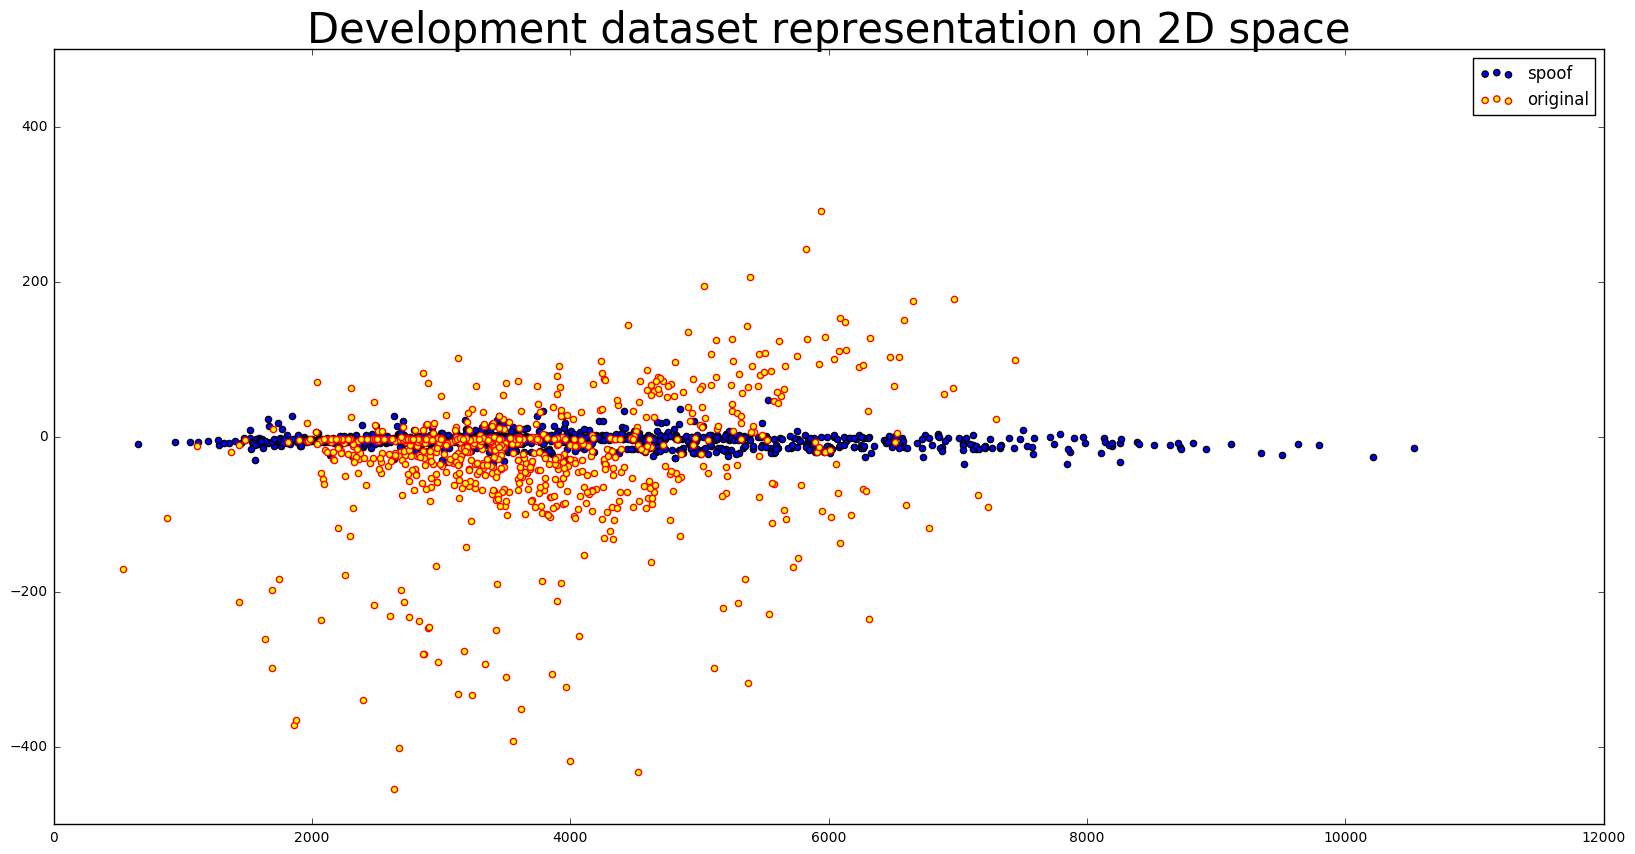

In [21]:
plt.figure(figsize=(20,10))
plt.title('Development dataset representation on 2D space', size = 30)
plt.scatter(sigmaVectorSpoofD, meanSpoofD,  label="spoof")
plt.ylim(-500, 500)
plt.scatter(sigmaVectorOriginalD,meanOriginalD, color = 'yellow',edgecolors='red', label="original")
plt.legend()
plt.show()

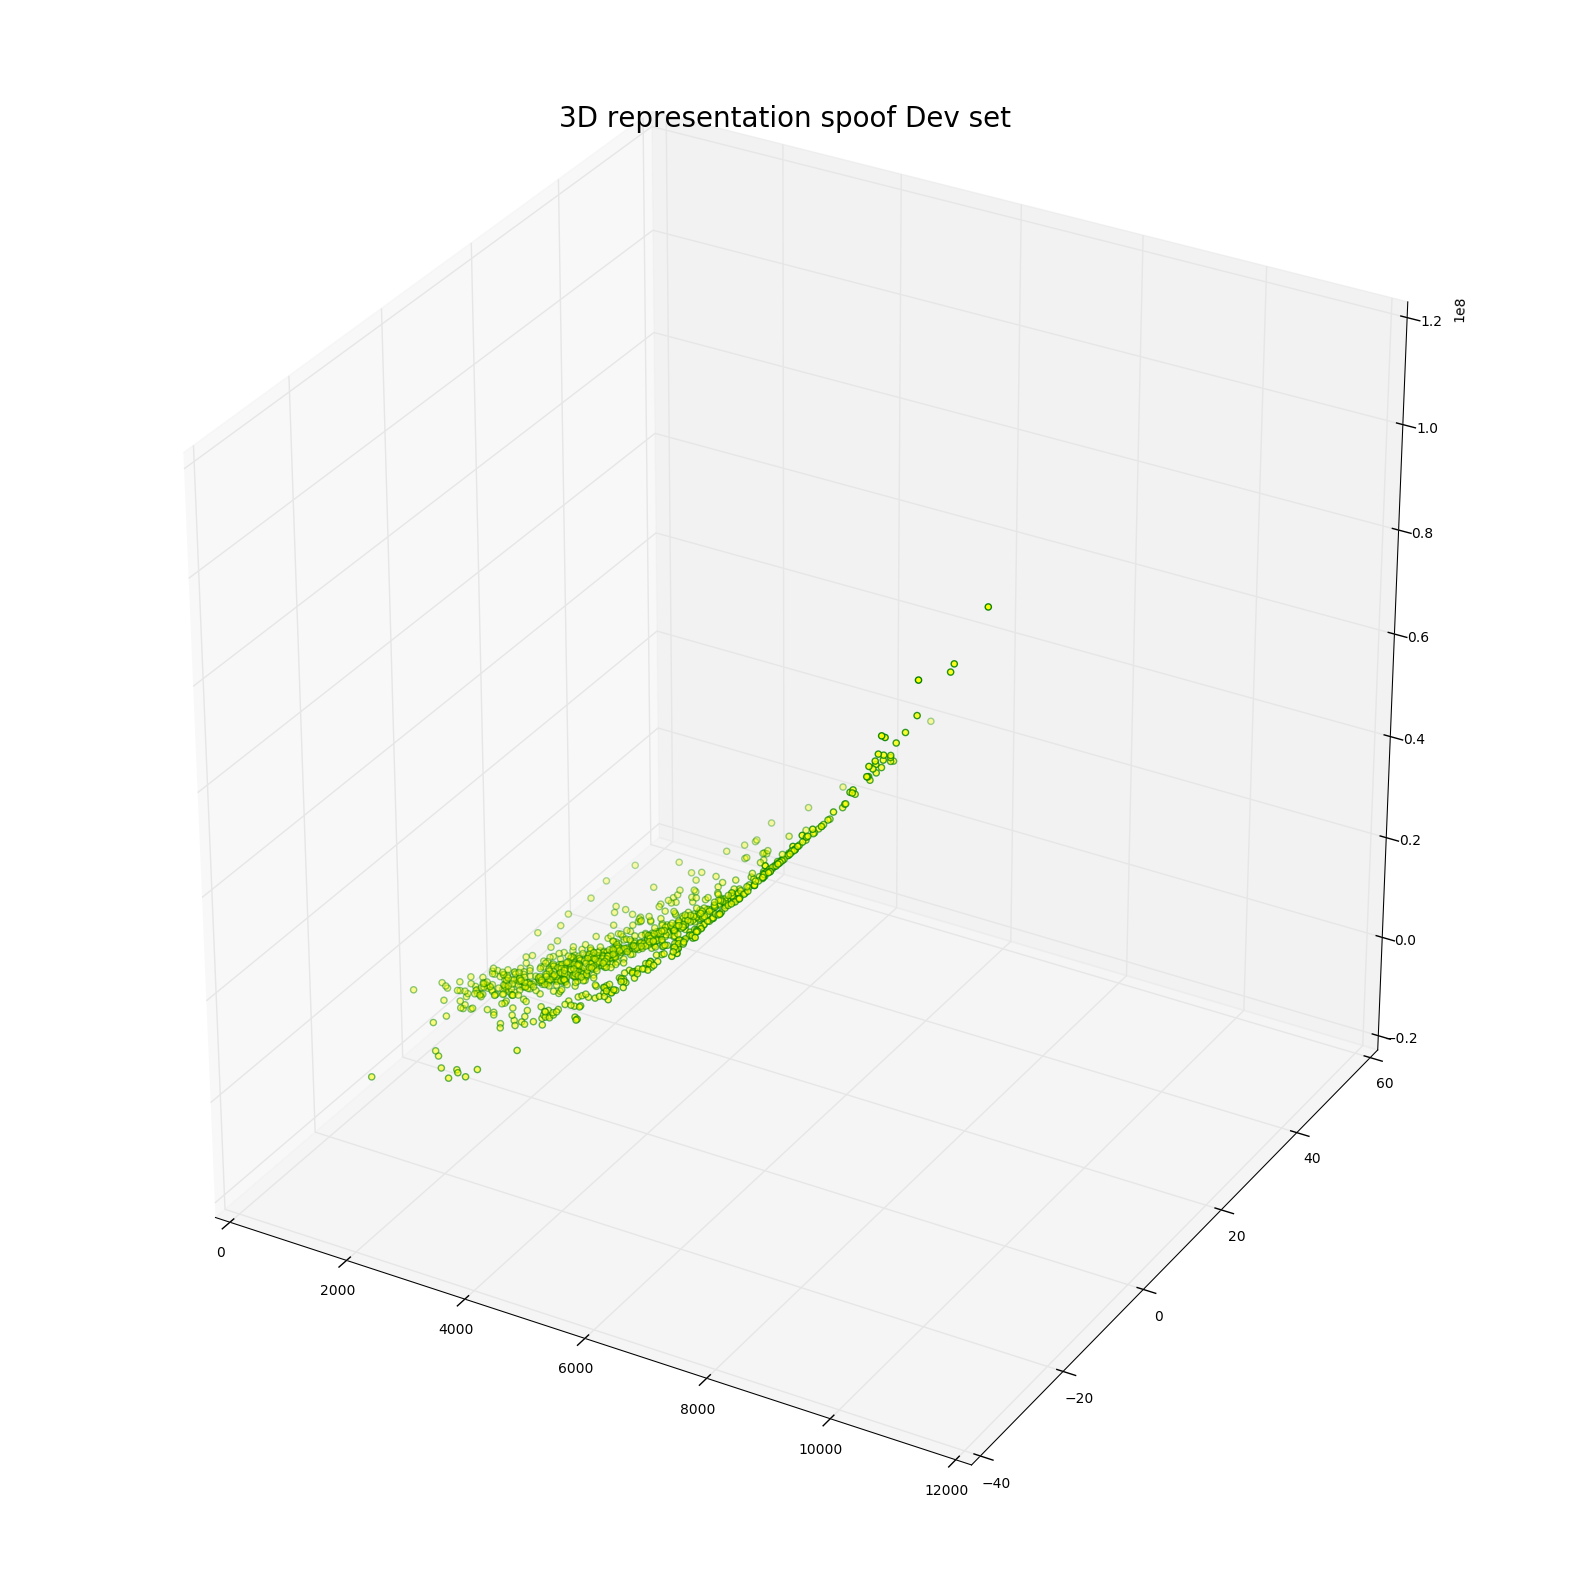

In [22]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D representation spoof Dev set', size = 20)
ax.scatter(sigmaVectorSpoofD, meanSpoofD,  varSpoofD, color = 'yellow', edgecolor = 'green', marker ='o')
plt.show()

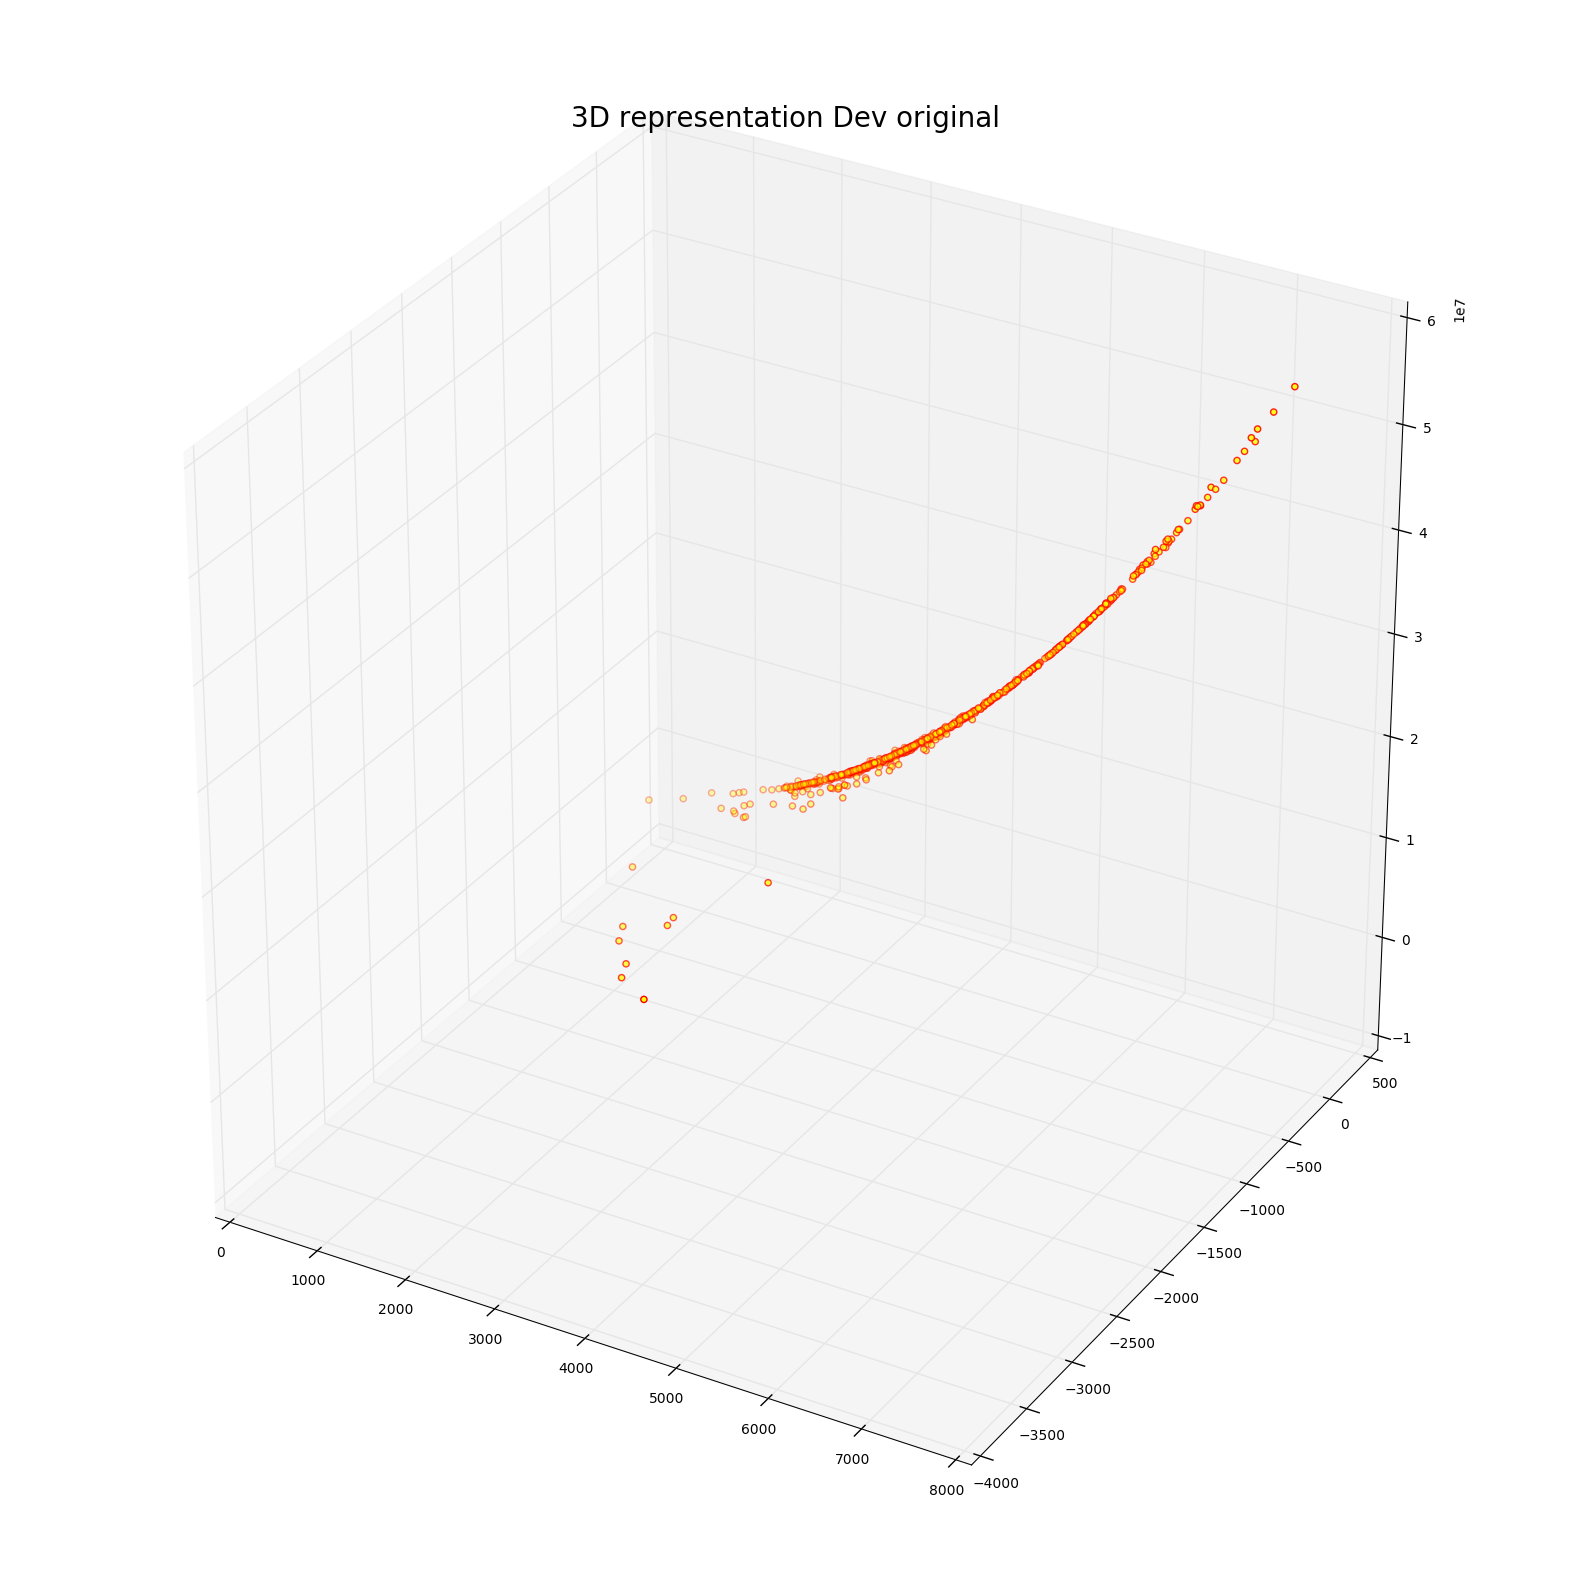

In [23]:
fig = plt.figure(figsize=(20,20))
bx = fig.add_subplot(111, projection='3d')
plt.title('3D representation Dev original', size = 20)
bx.scatter(sigmaVectorOriginalD,meanOriginalD,varOriginalD, color = 'yellow', edgecolors = 'red', label="original")
plt.show()

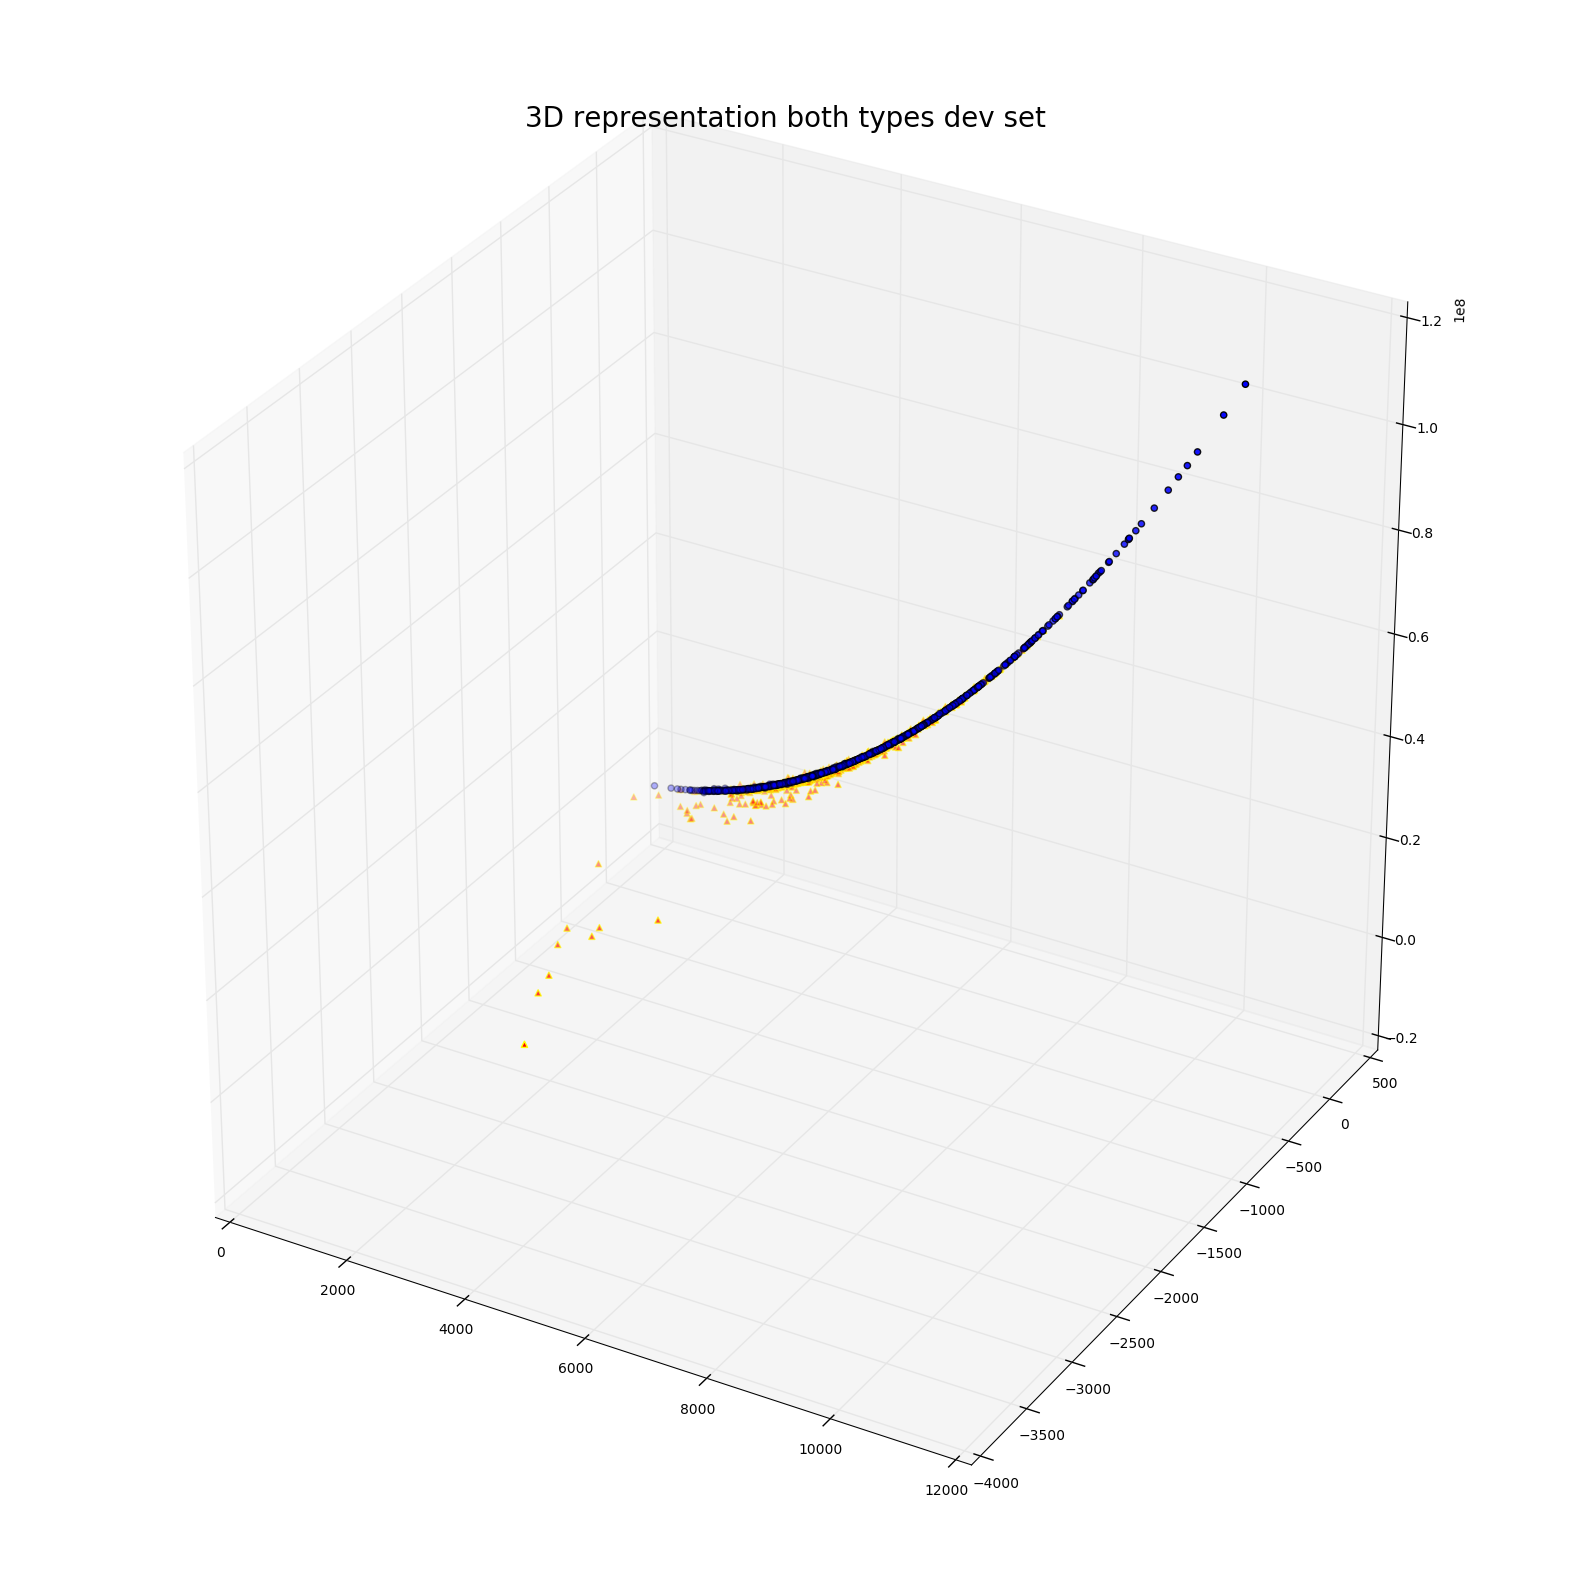

In [24]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D representation both types dev set', size = 20)
ax.scatter(sigmaVectorOriginalD,meanOriginalD, varOriginalD, color = 'red',edgecolor = 'yellow', marker ='^')
ax.scatter(sigmaVectorSpoofD, meanSpoofD,  varSpoofD,  marker ='o')
plt.show()

# Werth images development set

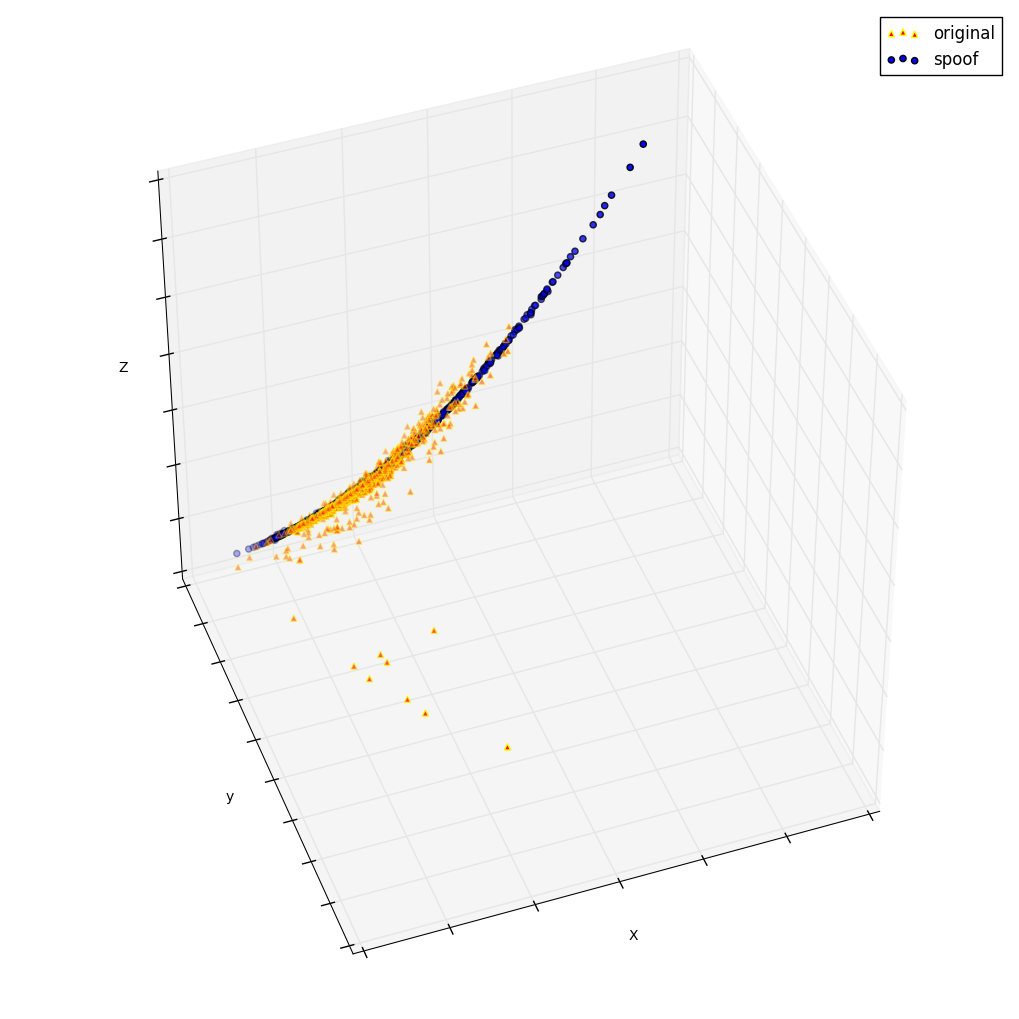

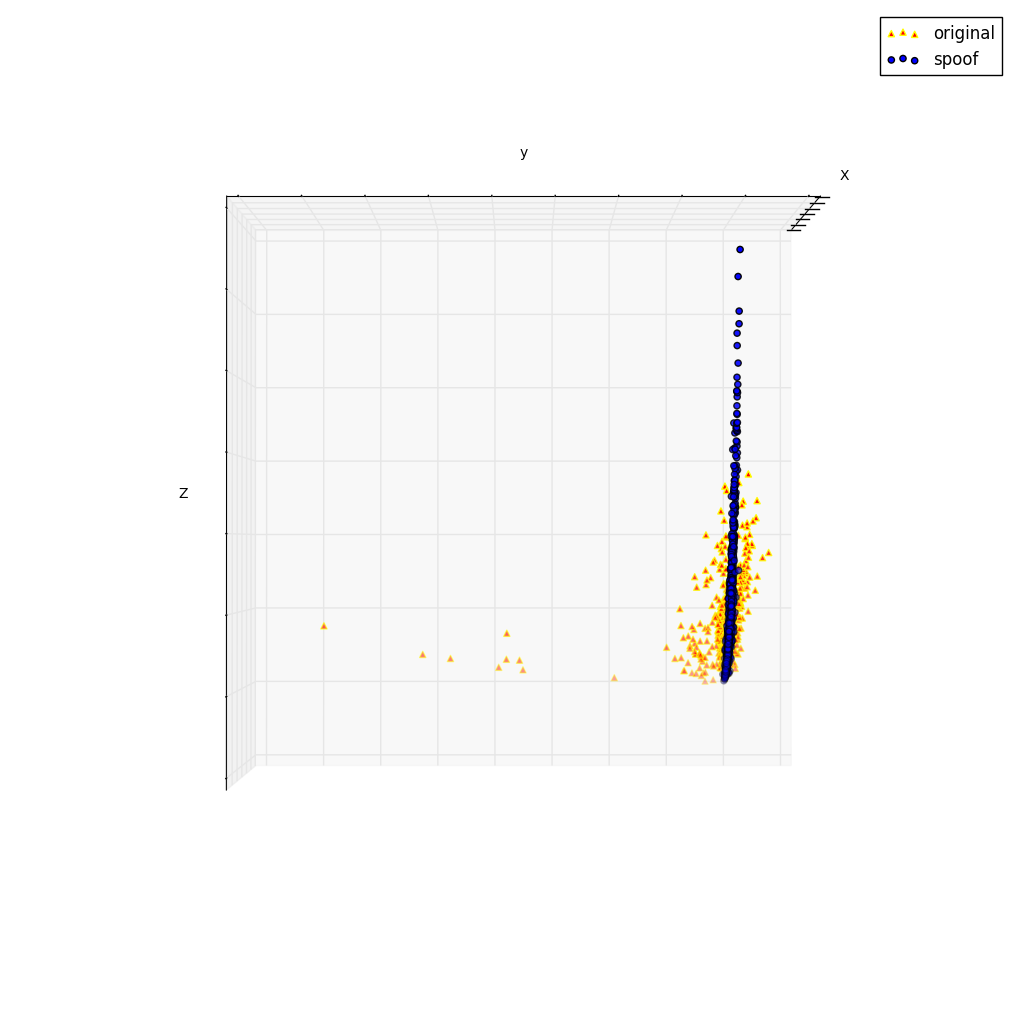

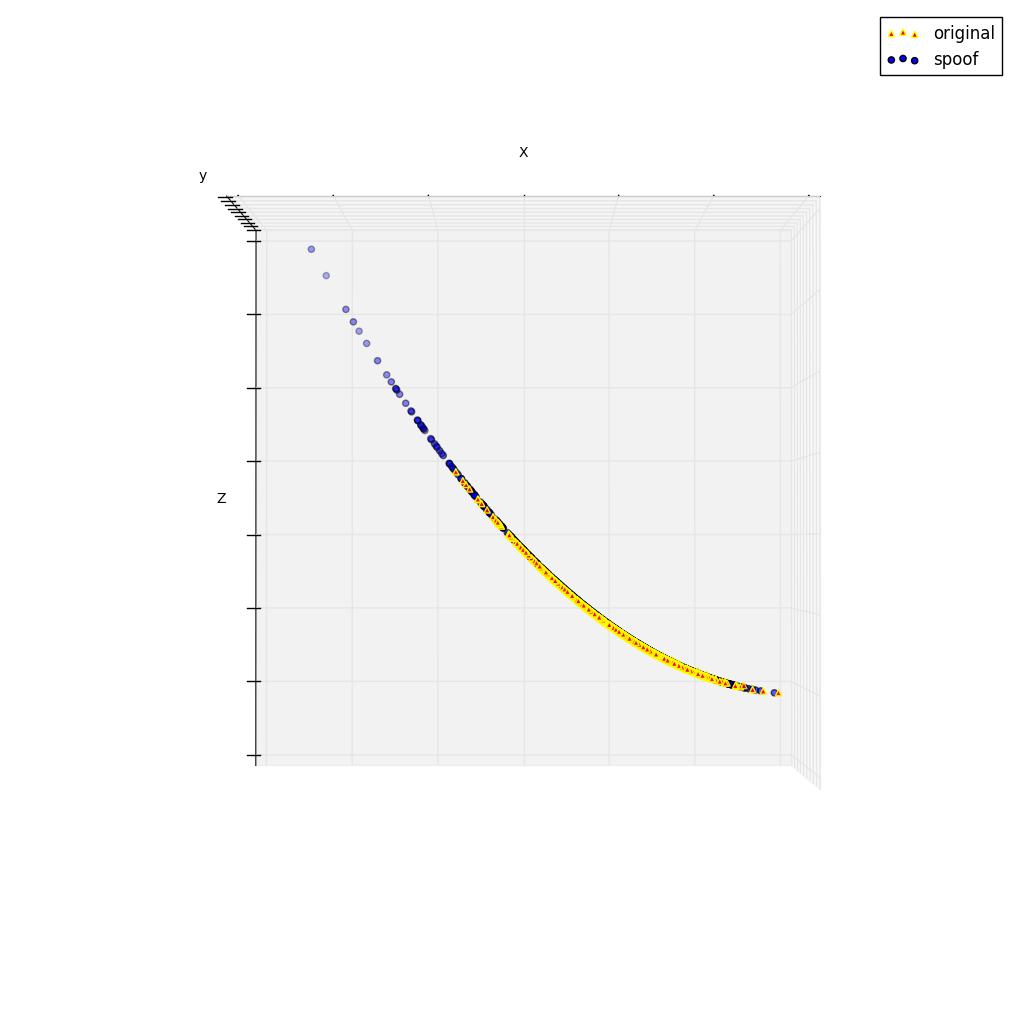

In [29]:
def plot_figs(fig_num, elev, azim, X_train):
    fig = plt.figure(fig_num, figsize=(10, 10))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(sigmaVectorOriginalD,meanOriginalD,varOriginalD, color = 'red',edgecolor = 'yellow', marker ='^', label = 'original')
    ax.scatter(sigmaVectorSpoofD, meanSpoofD,  varSpoofD,  marker ='o', label = 'spoof')
    
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_zlabel('Z')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.legend()

elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train)

plt.show()

# Make sets of data

In [26]:
X_train_original = np.vstack([sigmaVectorOriginal, meanOriginal,  varOriginal]).T
X_train_spoof = np.vstack([sigmaVectorSpoof, meanSpoof,  varSpoof]).T

X_test_original = np.vstack([sigmaVectorOriginalD, meanOriginalD,  varOriginalD]).T
X_test_spoof = np.vstack([sigmaVectorSpoofD, meanSpoofD,  varSpoofD]).T


In [27]:
X_train = np.vstack([X_train_original, X_train_spoof])
X_test = np.vstack([X_test_original, X_test_spoof])

In [28]:
y_train = np.concatenate([np.zeros(X_train_original.shape[0]), np.ones(X_train_spoof.shape[0])])
y_test = np.concatenate([np.zeros(X_test_original.shape[0]), np.ones(X_test_spoof.shape[0])])

# Uploading data

In [30]:
np.savetxt('X_train_original.txt', X_train_original)
np.savetxt('X_train_spoof.txt', X_train_spoof)
np.savetxt('X_test_original.txt', X_test_original)
np.savetxt('X_test_spoof.txt', X_test_spoof)

In [31]:
print X_train_original.shape, X_train_spoof.shape

(1508L, 3L) (1508L, 3L)


# Export data

In [32]:
X_train_original = np.loadtxt('./FeatureVector(mean, variance, sigma)/X_train_original.txt')
X_train_spoof = np.loadtxt('./FeatureVector(mean, variance, sigma)/X_train_spoof.txt')

X_test_original = np.loadtxt('./FeatureVector(mean, variance, sigma)/X_test_original.txt')
X_test_spoof = np.loadtxt('./FeatureVector(mean, variance, sigma)/X_test_spoof.txt')


# Perceptron

In [33]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

In [34]:
clf = Perceptron ( random_state=241)
clf.fit (X_train, y_train )
predictions = clf.predict(X_test)
score = accuracy_score(y_test,predictions)
print score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Perceptron(random_state=241)
clf.fit(X_train_scaled, y_train)
prediciton = clf.predict(X_test_scaled)

score_scaled= accuracy_score(prediciton, y_test)

print score_scaled

0.555555555556
0.647368421053


# Linear Regression Classifier

(Also read http://scikit-learn.org/stable/modules/linear_model.html)


In [35]:
from sklearn import datasets, linear_model


ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

prediciton = ols.predict(X_test)


# SVM

In [36]:
from sklearn.svm import SVC
clf = SVC()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
prediciton = clf.predict(X_test_scaled)

score_scaled= accuracy_score(prediciton, y_test)
print score_scaled

0.757894736842


# GMM

In [37]:
from sklearn.mixture import GMM

In [38]:
for n_g in xrange(1,50):

    g1 =  GMM(n_components = n_g, covariance_type='full',init_params='wmc', n_iter=20)
    g1.fit(X_train_original)

    g2 =  GMM(n_components = n_g, covariance_type='full',init_params='wmc', n_iter=20)
    g2.fit(X_train_spoof)

    prediction  = np.array(np.log(X_train_original.shape[0])+ g1.score(X_test)  < np.log(X_train_spoof.shape[0])+g2.score(X_test)).astype('int')

    accuracy = np.mean(prediction == y_test) * 100

    print 'n_g = %d, accuracy =  %f' %(n_g, accuracy)

n_g = 1, accuracy =  73.801170
n_g = 2, accuracy =  73.918129
n_g = 3, accuracy =  72.923977
n_g = 4, accuracy =  72.339181
n_g = 5, accuracy =  71.988304
n_g = 6, accuracy =  67.426901
n_g = 7, accuracy =  69.415205
n_g = 8, accuracy =  70.175439
n_g = 9, accuracy =  70.000000
n_g = 10, accuracy =  68.304094
n_g = 11, accuracy =  67.836257
n_g = 12, accuracy =  67.368421
n_g = 13, accuracy =  67.017544
n_g = 14, accuracy =  69.824561
n_g = 15, accuracy =  69.298246
n_g = 16, accuracy =  70.409357
n_g = 17, accuracy =  69.298246
n_g = 18, accuracy =  69.415205
n_g = 19, accuracy =  67.368421
n_g = 20, accuracy =  68.187135
n_g = 21, accuracy =  67.719298
n_g = 22, accuracy =  67.426901
n_g = 23, accuracy =  68.304094
n_g = 24, accuracy =  68.421053
n_g = 25, accuracy =  68.596491
n_g = 26, accuracy =  68.654971
n_g = 27, accuracy =  68.479532
n_g = 28, accuracy =  68.128655
n_g = 29, accuracy =  69.122807
n_g = 30, accuracy =  69.181287
n_g = 31, accuracy =  67.017544
n_g = 32, accurac

# absolute growth of chain


In [24]:
cy = []
for n in range(1, audio.shape[0]): 
    cy.append(audio[n]-audio[n-1])

In [43]:
def sigma(X):
    return np.sqrt(sum((X - np.mean(X))**2)/len(X)) #sigma   

In [42]:
# Chain signal representation

print 'Mean:' , np.mean(cy)
print 'Sigma', sigma(cy)
print 'Variance', np.var(cy)

print '-'*10
#original signal representation
print 'Mean:' , np.mean(audio)
print 'Sigma', sigma(audio)
print 'Variance', np.var(audio)


Mean: -0.00416284587281
Sigma 1208.96048819
Variance 1461585.46201
----------
Mean: -33.0996302981
Sigma 3657.13662845
Variance 13374648.3192


In [53]:
maxNormalisation = (audio) / float(np.max(audio))

In [54]:
print 'Mean:' , np.mean(maxNormalisation)
print 'Sigma', sigma(maxNormalisation)
print 'Variance', np.var(maxNormalisation)

Mean: -0.000121975858326
Sigma 0.092967579113
Variance 0.00864297076613
